In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Square Meter vs Price**

In [11]:
squareMeter = [50, 60, 70, 80, 90, 55, 65, 75, 85, 95] # X value

price = [150, 180, 210, 240, 270, 165, 195, 225, 255, 285] # Y value

Text(0, 0.5, 'Price x 1000$')

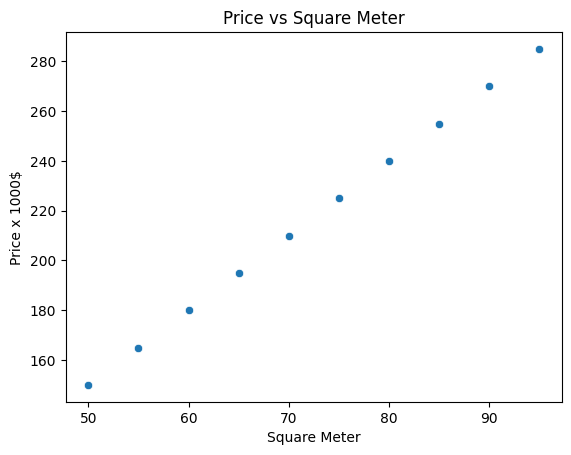

In [12]:
sns.scatterplot(x=squareMeter, y=price)
plt.title("Price vs Square Meter")
plt.xlabel("Square Meter")
plt.ylabel("Price x 1000$")

The **Linear Regression** formula for predicting the **y value** is:

**Predicted y value** = **slope** * **x** **+** **intercept/bias**

In our case, the formula will be:

**Predicted Price** = **slope** * **Square Meter** + **intercept**

We are going to be using **Residual Sum of Squares** as our *loss function*

We must take a random value for both of **slope** and **intercept**.

In [51]:
intercept = np.random.randn(1)
slope = np.random.randn(1)

**X** is **Square Meter**

**y** is **Price**

In [14]:
def predict(X, intercept, slope):
    return X*slope + intercept

In [15]:
def rss_errors(Y, y_pred):
    return (Y-y_pred)**2

In [16]:
def compute_rss(X,Y,intercept,slope):
    #X is price
    #Y is square meter
    #y_pred is the predicted value
    rss_total = 0
    for i in range(len(X)):
        y_pred = predict(X[i], intercept, slope)
        rss_total += rss_errors(Y[i],y_pred)
    return rss_total
    

We need the derivative of RSS with respect to both intercept, and slope.

The derivative of these values must be close to 0 in order to minimize the error.

y_pred = slope * x + intercept

Squared Residual:

(Y - y_pred)²

We place the **y_pred = slope * x + intercept** formula:

(Y - (slope * x + intercept))²

This is the **squared residual** formula.

Now what we need to do is, take the derivatives with respect to both slope and intercept.

**WITH RESPECT TO INTERCEPT**

-2(Y - (slope * X + intercept))

**WITH RESPECT TO SLOPE**

-2 * X * (slope * X + intercept))

In [17]:
def derivative_with_respect_to_intercept(Y, y_pred):
    return -2 * (Y - y_pred)

def derivative_with_respect_to_slope(X, Y, y_pred):
    return -2 * X * (Y - y_pred)

In [18]:
def find_avg_total_d_slope_intercept(X, Y, intercept, slope):
    total_d_intercept = 0
    total_d_slope = 0
    for i in range(len(X)):
        total_d_intercept += derivative_with_respect_to_intercept(Y[i], predict(X[i], intercept, slope))
        total_d_slope += derivative_with_respect_to_slope(X[i], Y[i], predict(X[i], intercept, slope))
    
    return total_d_slope/len(X), total_d_intercept/len(X)

We need to set up a learning rate and number of iterations for our algorithm.

In [50]:
learning_rate = 0.0001
num_iterations = 1000

**Gradient Descent Loop**

In [52]:
def gradient_descent(X, Y, intercept, slope, num_iterations, learning_rate):
    # To review RSS score
    rss_history = []
    
    for i in range(num_iterations):
        #getting averages
        avg_d_slope, avg_d_intercept = find_avg_total_d_slope_intercept(X, Y, intercept, slope)
        # Calculating new intercept and slope values
        slope = slope - (learning_rate * avg_d_slope)
        intercept = intercept - (learning_rate * avg_d_intercept)
        #calculating the rss score
        rss_score = compute_rss(X,Y,intercept,slope)
        
        rss_history.append(rss_score)
        
        # print(f"RSS Score for iteration: {i + 1}: {rss_score}")
        
    return intercept, slope, rss_history

In [ ]:
intercept, slope, rss_history = gradient_descent(squareMeter, price, intercept, slope, num_iterations, learning_rate)

In [22]:
print(f"Final intercept value: {intercept}")
print(f"Final slope value: {slope}")

print(f"Our linear regression function: {slope}*X + {intercept}")

Final intercept value: [-0.06239629]
Final slope value: [3.11961076]
Our linear regression function: [3.11961076]*X + [-0.06239629]


In [54]:
y_pred = []
for i in range(len(squareMeter)):
    y_pred.append(predict(squareMeter[i], intercept, slope))
    

In [55]:
y_pred

[array([150.33277695]),
 array([180.2014745]),
 array([210.07017206]),
 array([239.93886961]),
 array([269.80756717]),
 array([165.26712572]),
 array([195.13582328]),
 array([225.00452083]),
 array([254.87321839]),
 array([284.74191594])]

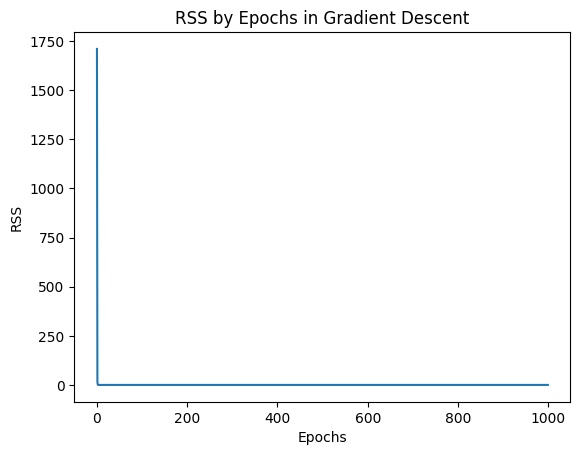

In [57]:
plt.plot(rss_history)
plt.title('RSS by Epochs in Gradient Descent')
plt.xlabel('Epochs')
plt.ylabel('RSS')
plt.show()